In [1]:
%pip install pandas numpy matplotlib openpyxl


  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.8-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached numpy-2.2


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


carga de archivo y visualizar primeras filas para verificar que este cargando correctamente

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo 
archivo = "Detalle_precios_limpio.xlsx"  # Asegúrate de que el archivo esté en la misma carpeta que el notebook
df = pd.read_excel(archivo)

# Mostrar las primeras filas para verificar la carga
print("Primeras filas del DataFrame:")
print(df.head())


Primeras filas del DataFrame:
  CVE_DOC  FECHA_DOC            NOMBRE_VENDEDOR                NOMBRE_CLIENTE  \
0  F37034 2022-01-05  LETICIA RAMIREZ HERNANDEZ            PÚBLICO EN GENERAL   
1  F37036 2022-01-05  LETICIA RAMIREZ HERNANDEZ  JUAN ANTONIO RESENDIZ UGALDE   
2  F37041 2022-01-05   DIEGO ARMANDO LEON DURAN     ANA BARBARA CRUZ PALACIOS   
3  F37042 2022-01-05   DIEGO ARMANDO LEON DURAN          OMAR RODRIGUEZ GOMEZ   
4  F37043 2022-01-05  LETICIA RAMIREZ HERNANDEZ            PÚBLICO EN GENERAL   

   CANT   CVE_ART                                    DESCR  PRECIO_UNITARIO  \
0     1  TUE00244  TUB COBRE 5/16"ØX165MM CIRCULA1.5KW127V           434.48   
1     1  TUA00028  TUA U" 5/16 ØX250MM 1200W 120V TAP1"NPT          1264.05   
2     7    TP0007     TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT           551.61   
3     1    TP0001     TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT           140.00   
4     2   BP00242  BAN P INOX 115MMX235MM 1000W 127V T/TOR           172.41   

   COSTO

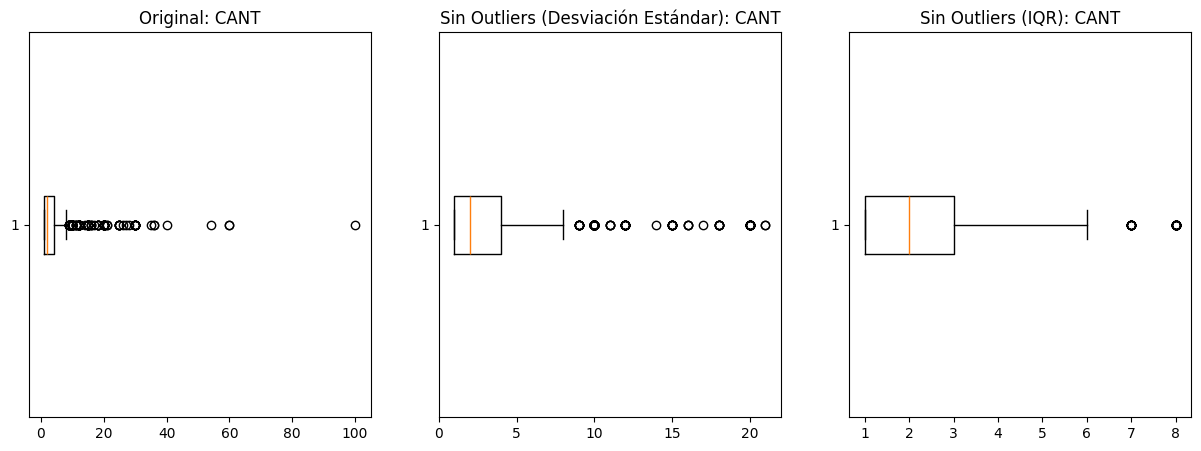

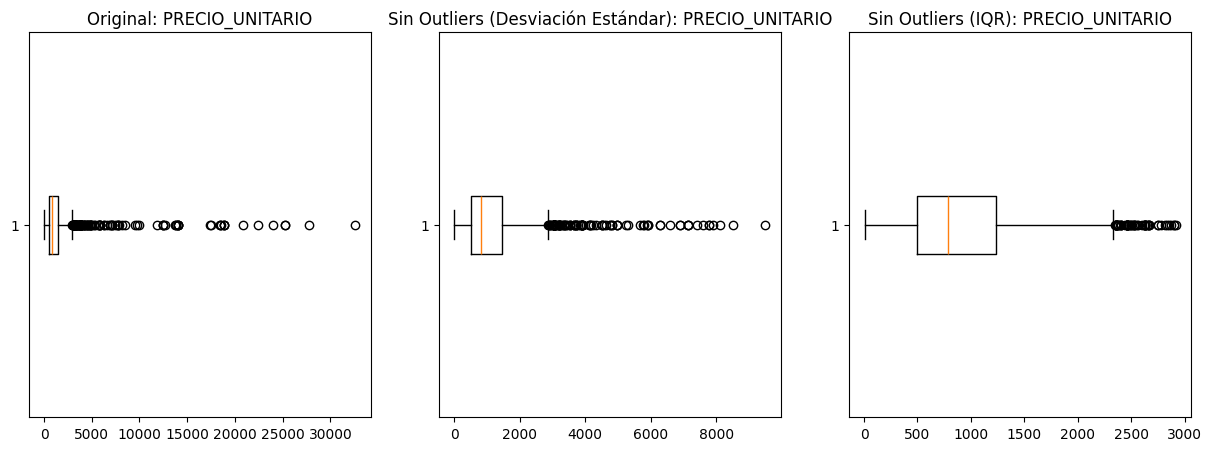

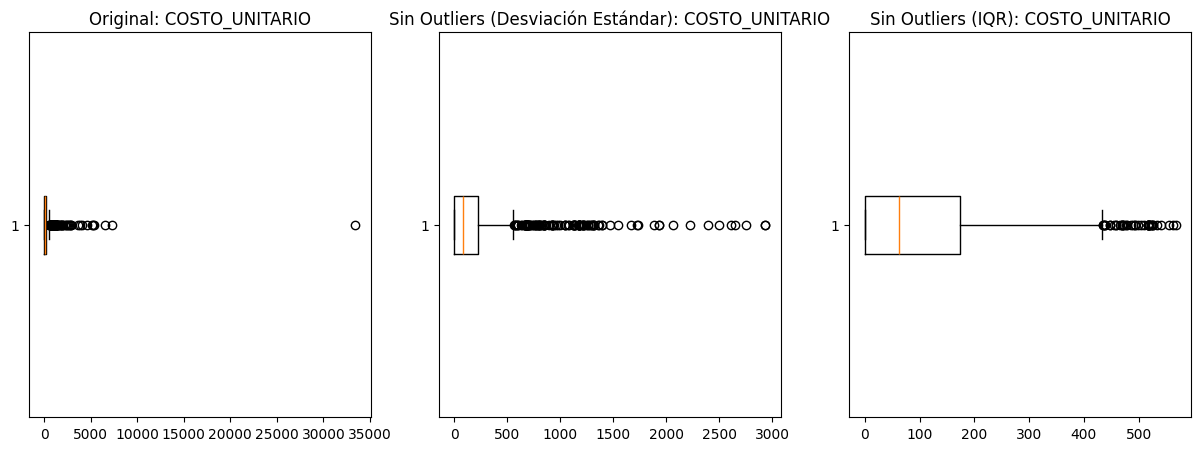

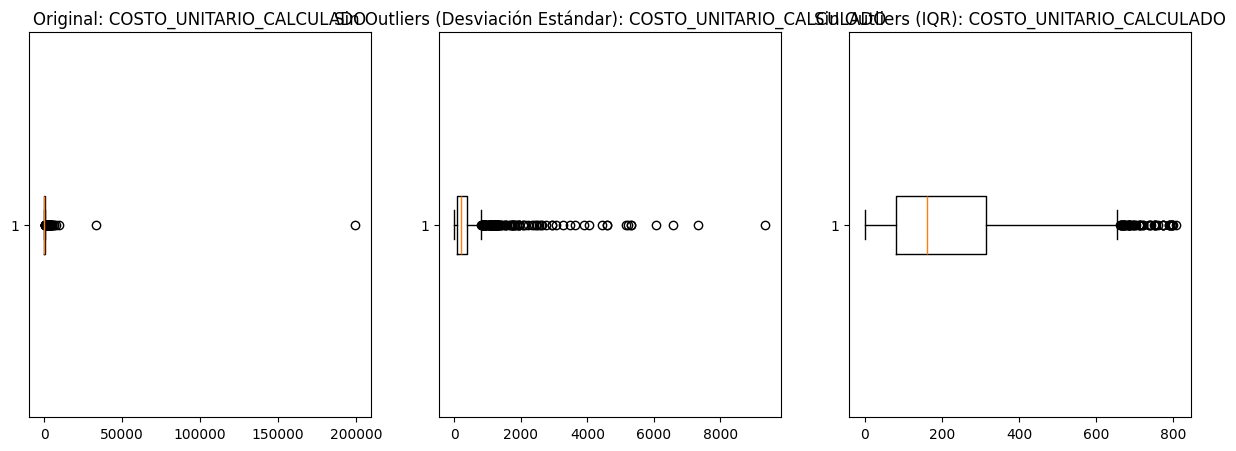

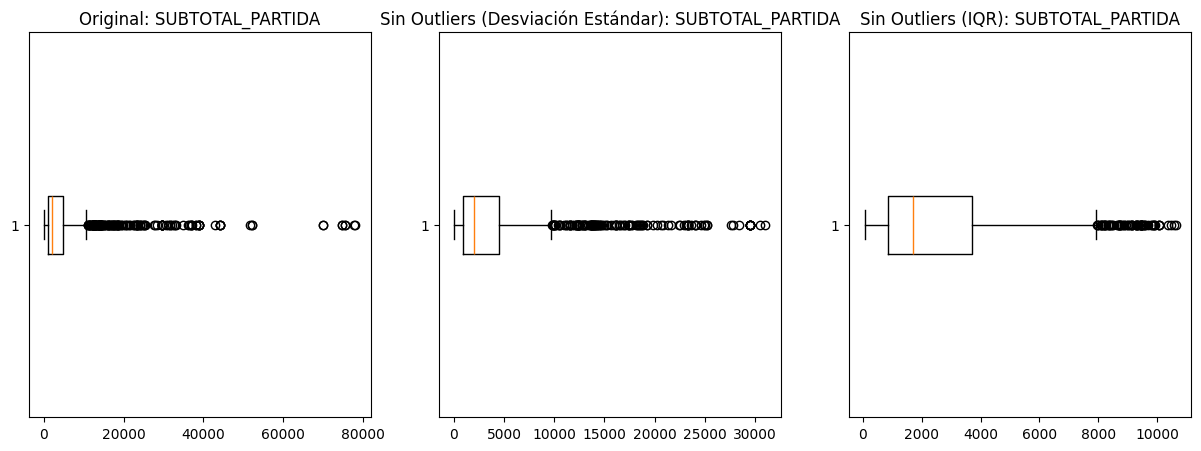

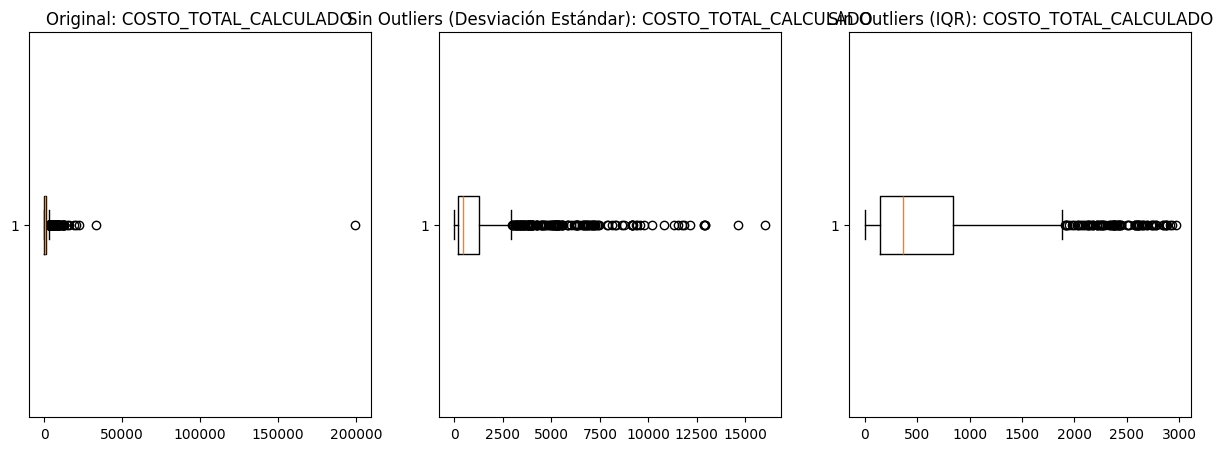

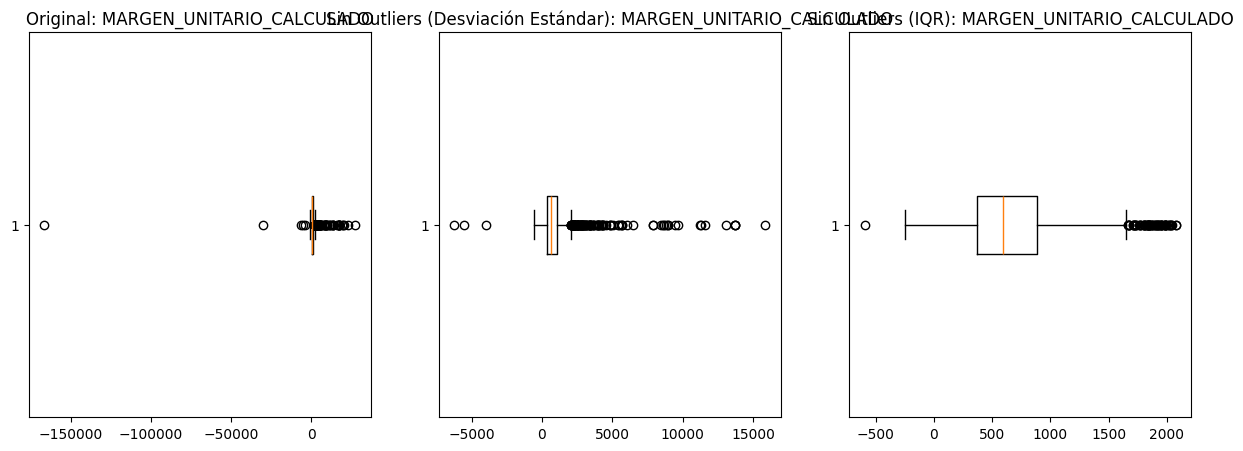

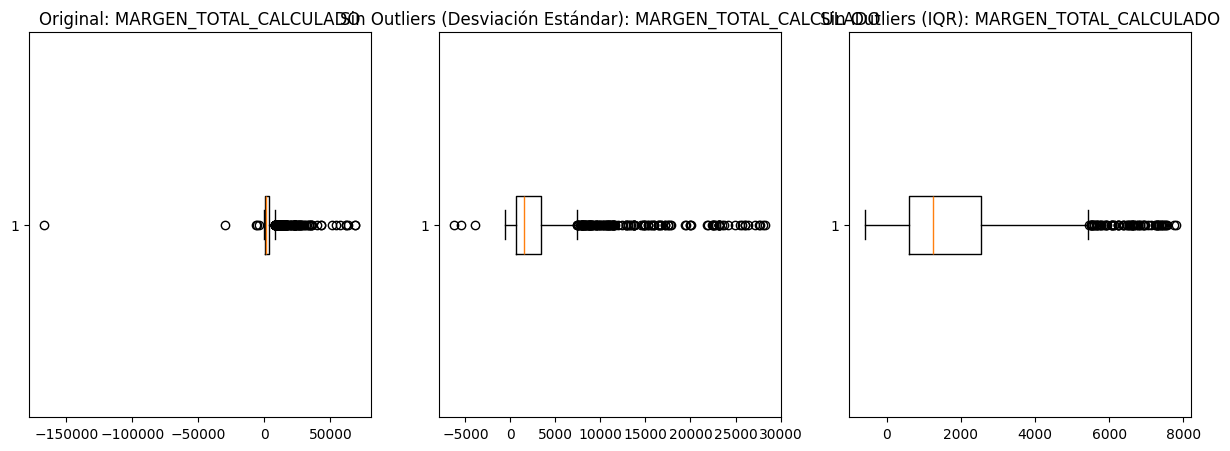

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo limpio
archivo = "Detalle_precios_limpio.xlsx"
df = pd.read_excel(archivo)

# Seleccionar solo columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns

# 1. Método Desviación Estándar para eliminar outliers
def eliminar_outliers_desviacion(df, columna, z_score_threshold=3):
    media = df[columna].mean()
    desviacion = df[columna].std()
    z_scores = (df[columna] - media) / desviacion  # Cálculo manual de z-score
    return df[abs(z_scores) < z_score_threshold]

# 2. Método Rango Intercuartílico (IQR) para eliminar outliers
def eliminar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return df[(df[columna] >= lim_inf) & (df[columna] <= lim_sup)]

# Aplicar ambos métodos y graficar boxplots
for columna in columnas_numericas:
    df_sin_outliers_desviacion = eliminar_outliers_desviacion(df, columna)
    df_sin_outliers_iqr = eliminar_outliers_iqr(df, columna)

    # Gráficos de caja (Boxplots)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].boxplot(df[columna], vert=False)
    axes[0].set_title(f"Original: {columna}")

    axes[1].boxplot(df_sin_outliers_desviacion[columna], vert=False)
    axes[1].set_title(f"Sin Outliers (Desviación Estándar): {columna}")

    axes[2].boxplot(df_sin_outliers_iqr[columna], vert=False)
    axes[2].set_title(f"Sin Outliers (IQR): {columna}")

    plt.show()

# Guardar el DataFrame sin outliers
df_sin_outliers = df.copy()
for columna in columnas_numericas:
    df_sin_outliers = eliminar_outliers_iqr(df_sin_outliers, columna)  # Se usa IQR por defecto

df_sin_outliers.to_excel("Detalle_precios_sin_outliers.xlsx", index=False)

